# Пример 1: Ирисы Фишера

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(type(iris_dataset))

In [ ]:
print('{}'.format(iris_dataset.keys()))

In [ ]:
print(iris_dataset['DESCR'])

In [ ]:
print(iris_dataset['data'])

In [ ]:
print(iris_dataset['target'])

In [ ]:
print(iris_dataset['target_names'])

In [ ]:
print(iris_dataset['feature_names'])

In [ ]:
#train_test_split разбивает данные на две части в соотношении 1/4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

In [ ]:
iris_dataframe=pd.DataFrame(X_train, columns = iris_dataset.feature_names)
iris_dataframe

In [ ]:
diagr=pd.plotting.scatter_matrix(iris_dataframe, c =y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s =60, alpha=.8)

In [ ]:
#импорт функции классификатора к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#обучение модели
knn.fit(X_train, y_train)

In [ ]:
X_new = np.array([[3,5,1,0.5]])

In [ ]:
#прогноз модели
prediction = knn.predict(X_new)
print(prediction)
print('predicted label = {}'.format(iris_dataset['target_names'][prediction]))

In [ ]:
#прогноз модели
y_pred=knn.predict(X_test)
print('Прогнозы для тестового набора \n {}'.format(y_pred))
print('Метки тестового набора \n {}'.format(y_test))

In [ ]:
#расчет accuracy "вручную"
a = 0
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        a+=1
print('accuracy = ', a/len(y_pred)*100, '%' )

In [ ]:
#расчет accuracy "с помощью метода knn.score"
print('accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
#расчет параметров precision, recall, F1-score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

# Пример 2: Street View House Numbers

In [1]:
from dataset import load_svhn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

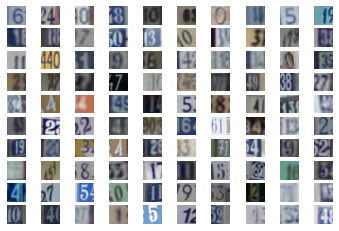

In [3]:
#выведем изображения для наглядности
plot_index = 1
for i in range(100):
    plt.subplot(10, 10, plot_index)
    image = train_X[i]
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plot_index += 1

In [ ]:
# Предобработка данных для бинарной классификации
#binary_train_mask = (train_y == 0) | (train_y == 9)
#binary_train_X = train_X[binary_train_mask]
#binary_train_y = train_y[binary_train_mask]

#binary_test_mask = (test_y == 0) | (test_y == 9)
#binary_test_X = test_X[binary_test_mask]
#binary_test_y = test_y[binary_test_mask]

# Преобразование в одномерный массив [num_samples, 32*32*3]
train_X = train_X.reshape(train_X.shape[0],-1)
test_X = test_X.reshape(test_X.shape[0],-1)

Задание 1:
Обучить модель и получить прогнозы для бинарной и мультиклассовой классификации набора данных
street view house numbers. Вычислить значения метрик точности (accuracy, precision, recall, fscore) при трех разных значениях гиперпараметра k.

Задание 2:
Реализовать метод кросс-валидации для подбора оптимального значения гиперпараметра k из массива k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50].
Разбить датасет на части с помощью функции StratifiedKFold (from sklearn.model_selection)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html,
вычислить средние метрики (accuracy, precision, recall, fscore) для каждого k из массива k_choices на валидационных данных. Сделать прогноз на тестовых данных с моделью, обученной при оптимальном значении k. 